2022-01-18 <br/>
Chocolate Bar ratings <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-01-18/readme.md

Line Map (Basic) - Completed <br/>
Line Map (Advanced) - Completed

https://plotly.com/python/lines-on-maps/

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='jupyterlab'
import os

In [2]:
df =pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-01-18/chocolate.csv')

In [3]:
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [4]:
df.shape

(2530, 10)

In [5]:
# Pulling the global coordinates 
# Special thanks to albertyw   : https://github.com/albertyw/avenews/blob/master/old/data/average-latitude-longitude-countries.csv
df_country = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/master/old/data/average-latitude-longitude-countries.csv')

In [6]:
df_country.head()

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [7]:
# Getting the refence counts of the number of transports
filtered_df= df.groupby(['country_of_bean_origin' ,'company_location']).count()['ref'].reset_index()

In [8]:
filtered_df.country_of_bean_origin.value_counts()

Madagascar            28
Peru                  26
Venezuela             25
Ecuador               25
Dominican Republic    22
                      ..
DR Congo               1
Martinique             1
Sierra Leone           1
Liberia                1
Australia              1
Name: country_of_bean_origin, Length: 62, dtype: int64

In [9]:
filtered_df.shape

(462, 3)

In [10]:
filtered_df.country_of_bean_origin.nunique()

62

In [11]:
filtered_df.head()

,country_of_bean_origin,company_location,ref
0,Australia,Australia,3
1,Belize,Amsterdam,1
2,Belize,Australia,1
3,Belize,Austria,1
4,Belize,Belgium,1


In [12]:
# Replacing U.S.A to facilitate the merge
filtered_df.replace({'company_location': {'U.S.A.': 'United States'}},inplace=True)

In [13]:
filtered_df.head()

,country_of_bean_origin,company_location,ref
0,Australia,Australia,3
1,Belize,Amsterdam,1
2,Belize,Australia,1
3,Belize,Austria,1
4,Belize,Belgium,1


In [14]:
df__company_location =  df_country.add_suffix('_company_location')
df__bean_origin=  df_country.add_suffix('_bean_origin')

In [15]:
df__company_location.head()

,ISO 3166 Country Code_company_location,Country_company_location,Latitude_company_location,Longitude_company_location
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [16]:
df__bean_origin.head()

,ISO 3166 Country Code_bean_origin,Country_bean_origin,Latitude_bean_origin,Longitude_bean_origin
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17


In [17]:
df_country[df_country['ISO 3166 Country Code']== 'US']

,ISO 3166 Country Code,Country,Latitude,Longitude
223,US,United States,38.0,-97.0


In [18]:
# Merging to pull the coordintes - From and to 
full_df= filtered_df.merge(df__company_location,how='inner',left_on='company_location', right_on='Country_company_location')
full_df= full_df.merge(df__bean_origin,how='inner',left_on='company_location', right_on='Country_bean_origin')

In [19]:
full_df.head()

,country_of_bean_origin,company_location,ref,ISO 3166 Country Code_company_location,Country_company_location,Latitude_company_location,Longitude_company_location,ISO 3166 Country Code_bean_origin,Country_bean_origin,Latitude_bean_origin,Longitude_bean_origin
0,Australia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
1,Belize,Australia,1,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
2,Blend,Australia,5,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
3,Bolivia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
4,Brazil,Australia,2,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0


In [20]:
full_df.columns

Index(['country_of_bean_origin', 'company_location', 'ref',
       'ISO 3166 Country Code_company_location', 'Country_company_location',
       'Latitude_company_location', 'Longitude_company_location',
       'ISO 3166 Country Code_bean_origin', 'Country_bean_origin',
       'Latitude_bean_origin', 'Longitude_bean_origin'],
      dtype='object')

In [21]:
fig = px.line_geo(filtered_df, locations="company_location",
                  color="country_of_bean_origin", # "continent" is one of the columns of gapminder
                  locationmode = 'country names' ,
                  projection="orthographic")
fig.update_layout(title= "How are the beans transported")

                  
fig.show()

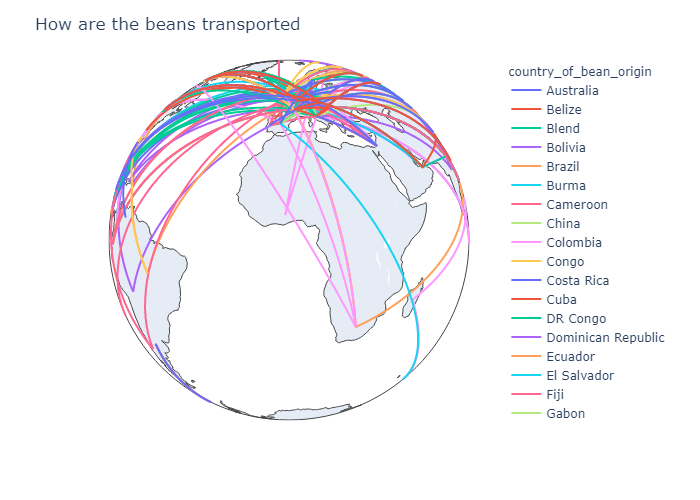

In [22]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [23]:
full_df.columns

Index(['country_of_bean_origin', 'company_location', 'ref',
       'ISO 3166 Country Code_company_location', 'Country_company_location',
       'Latitude_company_location', 'Longitude_company_location',
       'ISO 3166 Country Code_bean_origin', 'Country_bean_origin',
       'Latitude_bean_origin', 'Longitude_bean_origin'],
      dtype='object')

In [24]:
full_df.head()

,country_of_bean_origin,company_location,ref,ISO 3166 Country Code_company_location,Country_company_location,Latitude_company_location,Longitude_company_location,ISO 3166 Country Code_bean_origin,Country_bean_origin,Latitude_bean_origin,Longitude_bean_origin
0,Australia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
1,Belize,Australia,1,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
2,Blend,Australia,5,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
3,Bolivia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
4,Brazil,Australia,2,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0


In [25]:
full_df.shape

(395, 11)

In [26]:
full_df.ref.max()

154

In [27]:
full_df.isnull().values.any()

False

In [28]:
full_df

,country_of_bean_origin,company_location,ref,ISO 3166 Country Code_company_location,Country_company_location,Latitude_company_location,Longitude_company_location,ISO 3166 Country Code_bean_origin,Country_bean_origin,Latitude_bean_origin,Longitude_bean_origin
0,Australia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
1,Belize,Australia,1,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
2,Blend,Australia,5,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
3,Bolivia,Australia,3,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
4,Brazil,Australia,2,AU,Australia,-27.0,133.0,AU,Australia,-27.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...
390,Suriname,Suriname,1,SR,Suriname,4.0,-56.0,SR,Suriname,4.0,-56.0
391,Thailand,Thailand,5,TH,Thailand,15.0,100.0,TH,Thailand,15.0,100.0
392,Vanuatu,Vanuatu,4,VU,Vanuatu,-16.0,167.0,VU,Vanuatu,-16.0,167.0
393,Venezuela,Venezuela,31,VE,Venezuela,8.0,-66.0,VE,Venezuela,8.0,-66.0


In [29]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()

fig.add_trace(go.Scattergeo(
    locationmode = 'country names' ,
    hoverinfo = 'text',
    text = full_df['company_location'],
    lon=full_df['Longitude_bean_origin'],
    lat=full_df['Latitude_bean_origin'],
    mode = 'markers',
    marker = dict(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = dict(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    )))

flight_paths = []
for i in range(len(full_df)):
    fig.add_trace(
        go.Scattergeo(
            locations=full_df['company_location'],
            locationmode = 'country names' ,
            lon = [full_df['Longitude_bean_origin'][i], full_df['Longitude_company_location'][i]],
            lat = [full_df['Latitude_bean_origin'][i], full_df['Latitude_company_location'][i]],
            mode = 'lines',
            line = dict(width = 1,color = 'red'),
            opacity = float(full_df['ref'][i]) / float(full_df['ref'].max())
        )
    )

fig.update_layout(
    title_text = "How are the beans transported",
    showlegend = False,
    geo = dict(
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig.show()

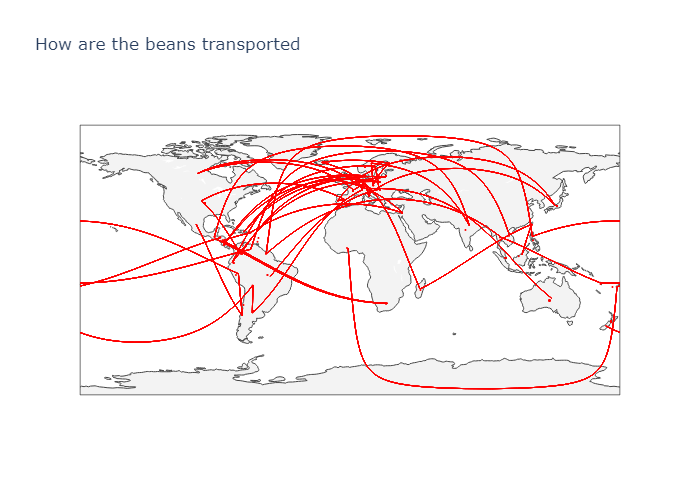

In [30]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)